# 3.3 Dashboard Metric
##### Contributor: Xiao Hong Chen

In [6]:
%pip install scipy
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine, text
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

load_dotenv()

DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")
DB_TABLE = os.getenv("DB_TABLE")

connection_string = (
    f"mysql+pymysql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
)

engine = create_engine(connection_string)

print("Database connection established successfully.")

df = pd.read_sql(text(f"SELECT * FROM {DB_TABLE}"), engine)
print("Data retrieved successfully.\n")
df.head()


selected_metrics = [
    "Jump Height(m)",
    "Peak Propulsive Force(N)",
    "Peak Velocity(m/s)",
    "Propulsive Net Impulse(N.s)",
    "mRSI",
]

Note: you may need to restart the kernel to use updated packages.
Database connection established successfully.
Data retrieved successfully.



In [7]:
# fix the timestamp to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# create a year month column for easier grouping
df['year_month'] = df['timestamp'].dt.to_period('M').astype(str)

#total tests per month
monthly_tests = df.groupby('year_month').size().reset_index(name="total_tests")

print(monthly_tests)

   year_month  total_tests
0     2018-10         1545
1     2019-01          304
2     2019-04          587
3     2019-05           61
4     2019-06          398
..        ...          ...
64    2025-06        78824
65    2025-07       155523
66    2025-08       204986
67    2025-09       216641
68    2025-10       139206

[69 rows x 2 columns]


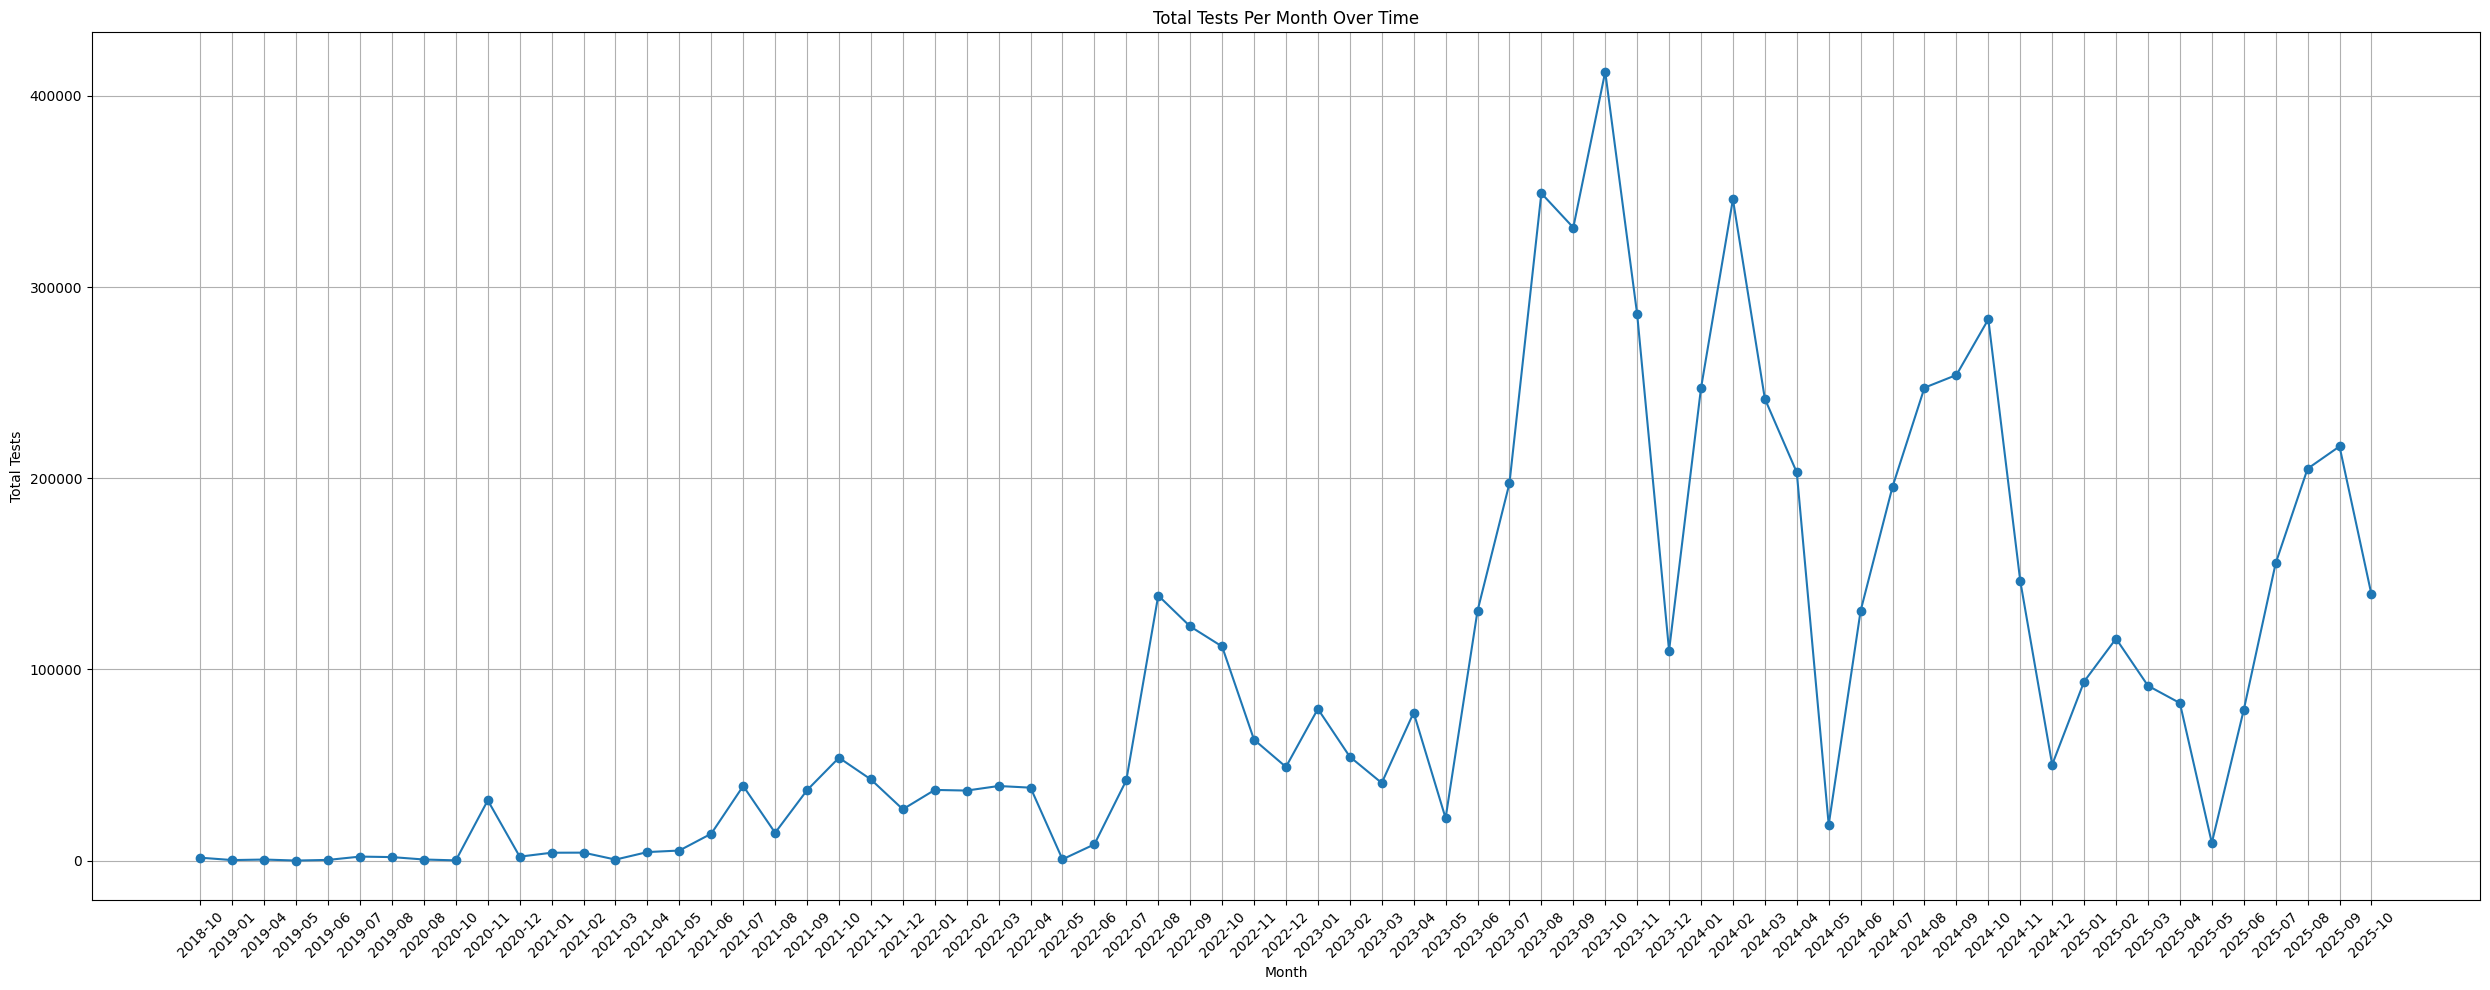

In [3]:
#plot monthly tests over time
plt.figure(figsize=(25,10))
plt.plot(monthly_tests['year_month'],monthly_tests['total_tests'], marker='o')
plt.xticks(rotation=45)
plt.title('Total Tests Per Month Over Time')
plt.xlabel("Month")
plt.ylabel("Total Tests")
plt.grid()
plt.tight_layout()
plt.show()

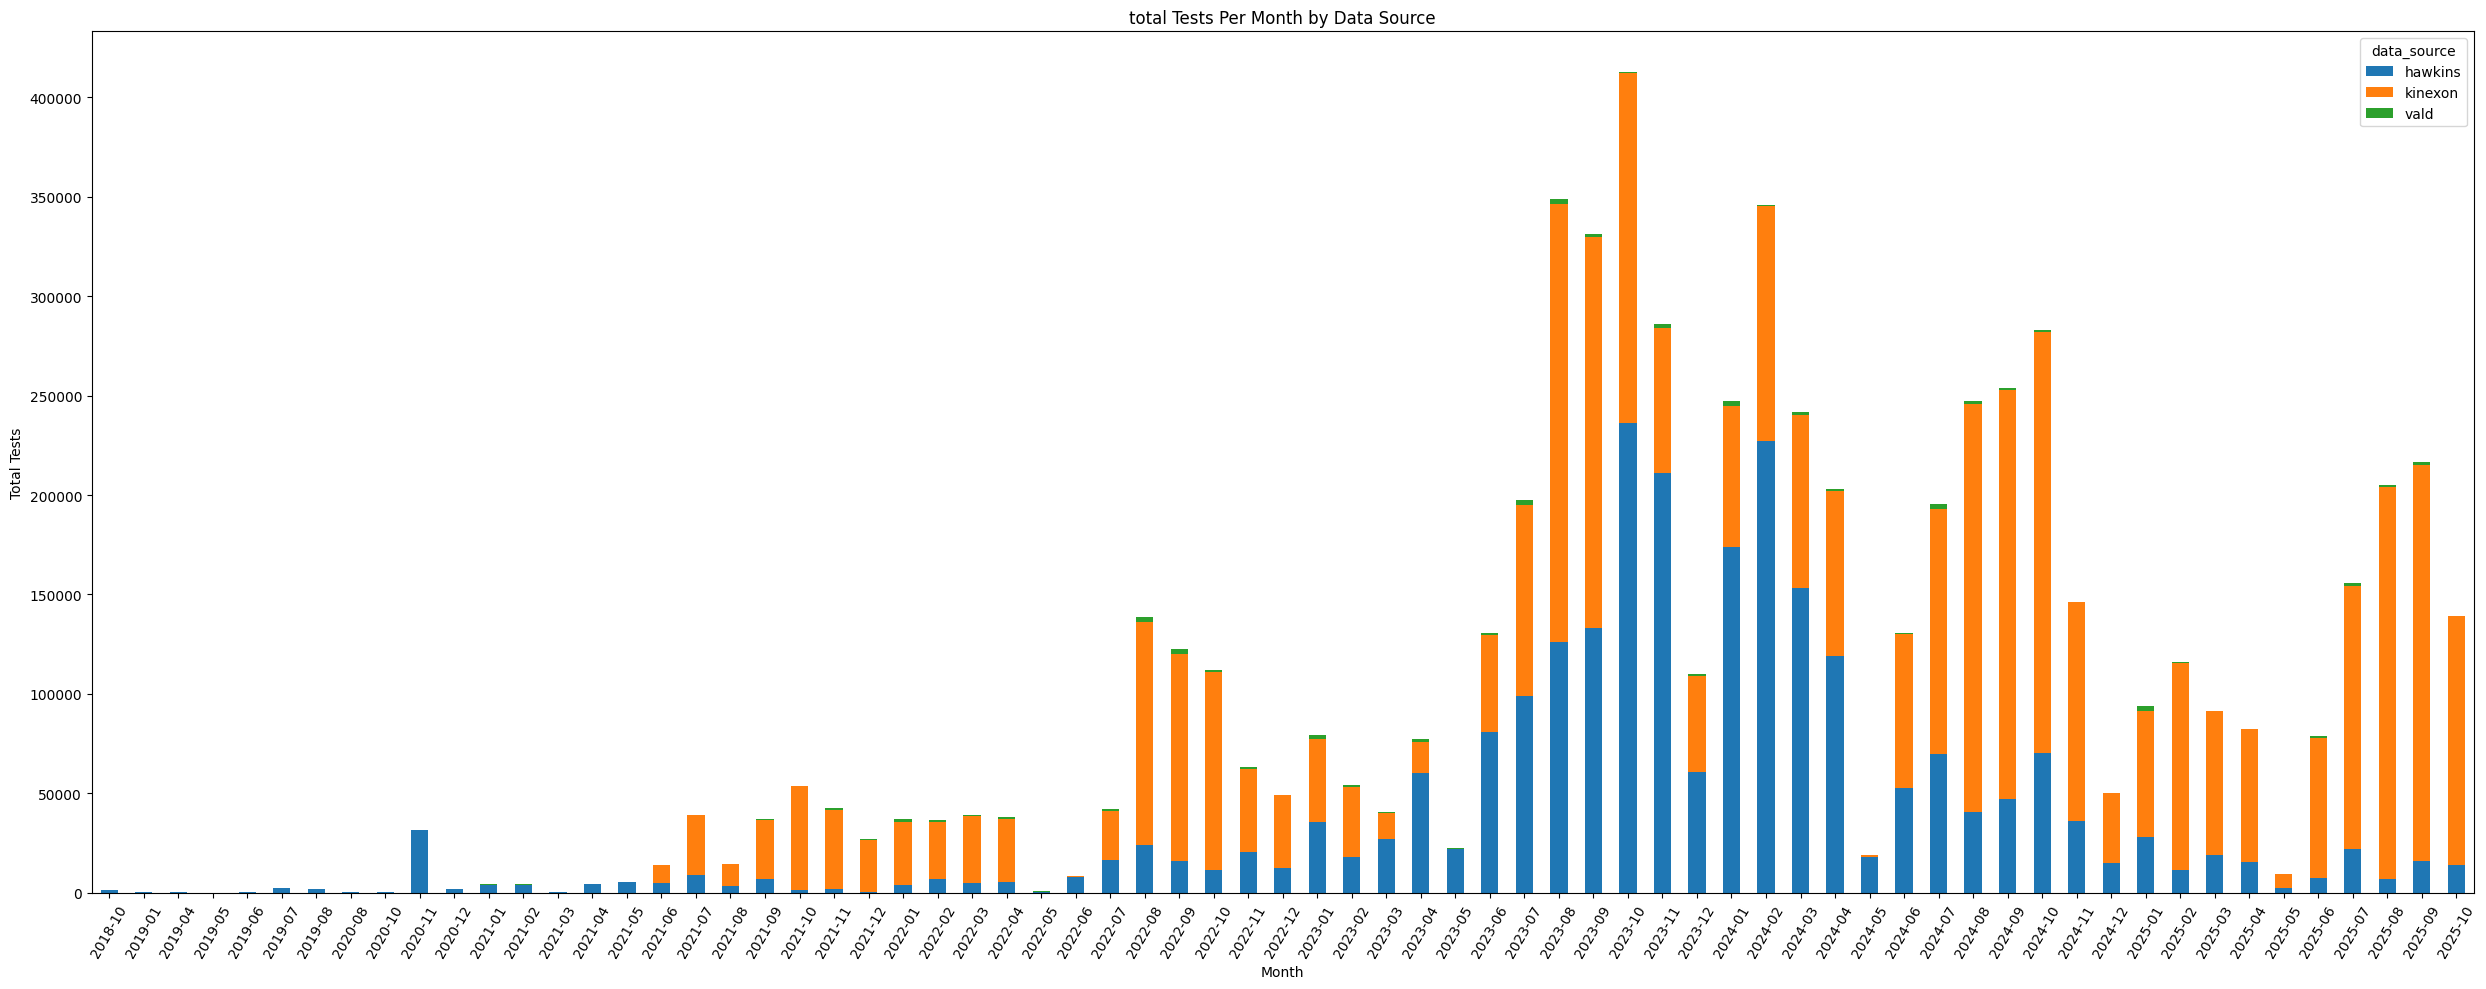

In [14]:
# Stacked Bar Chart based on Data Source
monthly_source = df.groupby(["year_month", "data_source"]).size().reset_index(name="count")

#pivot for stacked bar
monthly_pivot = monthly_source.pivot(index ="year_month", columns='data_source', values='count').fillna(0)

monthly_pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(25,10),
    title = "total Tests Per Month by Data Source"
)

plt.xlabel('Month')
plt.ylabel('Total Tests')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

The chart shows a long period of very low data collection early on, followed by a sustained increase in test volume later in the timeline. This early low activity may be due to limited use of the testing systems or delays in implementing consistent data collection procedures. Around the midpoint, there is a noticeable rise with large and consistent spikes in testing volume. Data collection also fluctuates strongly from month to month, which may reflect inconsistent adherence to testing schedules. Finally, the graph shows clear seasonal drop-offs: every year during May, there is little to no data collection, and December also displays a significant reduction in testing activity.